In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Dependents'] = df['Dependents'].replace(['3+'],3)

In [6]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df = df.drop(['Loan_ID'], axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df = pd.get_dummies(df)

In [10]:
print(df.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')


In [11]:
df = df.drop(['Gender_Female', 'Married_No', 'Dependents_3', 'Education_Not Graduate', 'Self_Employed_No', 'Property_Area_Rural', 'Loan_Status_N'], axis = 1)

In [12]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,1,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,1,0,0,1,1


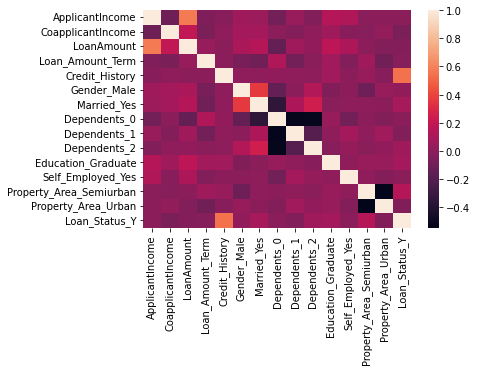

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(df.corr())
plt.show()

In [17]:
X = df.drop(['Loan_Status_Y'], axis = 1)
y = df['Loan_Status_Y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [18]:
from flaml import AutoML

automl_settings = {
    "time_budget": 60,
    "metric": 'accuracy',
    "task": 'classification'
}

automl = AutoML()
automl.fit(X_train = X_train, y_train = y_train, **automl_settings)

[flaml.automl: 09-14 00:25:44] {2565} INFO - task = classification
[flaml.automl: 09-14 00:25:44] {2567} INFO - Data split method: stratified
[flaml.automl: 09-14 00:25:44] {2570} INFO - Evaluation method: cv
[flaml.automl: 09-14 00:25:44] {2689} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 09-14 00:25:44] {2831} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 09-14 00:25:44] {3133} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-14 00:25:44] {3266} INFO - Estimated sufficient time budget=1191s. Estimated necessary time budget=27s.
[flaml.automl: 09-14 00:25:44] {3313} INFO -  at 0.2s,	estimator lgbm's best error=0.2174,	best estimator lgbm's best error=0.2174
[flaml.automl: 09-14 00:25:44] {3133} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-14 00:25:44] {3313} INFO -  at 0.3s,	estimator lgbm's best error=0.2174,	best estimator lgbm's best error=0.2174
[flaml.automl: 09-14 0

[flaml.automl: 09-14 00:25:51] {3133} INFO - iteration 36, current learner extra_tree
[flaml.automl: 09-14 00:25:52] {3313} INFO -  at 7.6s,	estimator extra_tree's best error=0.1826,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:25:52] {3133} INFO - iteration 37, current learner xgboost
[flaml.automl: 09-14 00:25:52] {3313} INFO -  at 7.8s,	estimator xgboost's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:25:52] {3133} INFO - iteration 38, current learner extra_tree
[flaml.automl: 09-14 00:25:52] {3313} INFO -  at 8.3s,	estimator extra_tree's best error=0.1826,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:25:52] {3133} INFO - iteration 39, current learner rf
[flaml.automl: 09-14 00:25:53] {3313} INFO -  at 8.7s,	estimator rf's best error=0.2130,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:25:53] {3133} INFO - iteration 40, current learner extra_tree
[flaml.automl: 09-14 00:25:53] {3313} INFO -

[flaml.automl: 09-14 00:26:02] {3133} INFO - iteration 74, current learner extra_tree
[flaml.automl: 09-14 00:26:03] {3313} INFO -  at 18.6s,	estimator extra_tree's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:03] {3133} INFO - iteration 75, current learner lgbm
[flaml.automl: 09-14 00:26:03] {3313} INFO -  at 18.7s,	estimator lgbm's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:03] {3133} INFO - iteration 76, current learner lgbm
[flaml.automl: 09-14 00:26:03] {3313} INFO -  at 18.8s,	estimator lgbm's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:03] {3133} INFO - iteration 77, current learner extra_tree
[flaml.automl: 09-14 00:26:03] {3313} INFO -  at 19.2s,	estimator extra_tree's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:03] {3133} INFO - iteration 78, current learner lgbm
[flaml.automl: 09-14 00:26:03] {3313} INFO -  at

[flaml.automl: 09-14 00:26:12] {3133} INFO - iteration 112, current learner xgboost
[flaml.automl: 09-14 00:26:12] {3313} INFO -  at 28.3s,	estimator xgboost's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:12] {3133} INFO - iteration 113, current learner extra_tree
[flaml.automl: 09-14 00:26:13] {3313} INFO -  at 28.9s,	estimator extra_tree's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:13] {3133} INFO - iteration 114, current learner lgbm
[flaml.automl: 09-14 00:26:13] {3313} INFO -  at 29.0s,	estimator lgbm's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:13] {3133} INFO - iteration 115, current learner lgbm
[flaml.automl: 09-14 00:26:13] {3313} INFO -  at 29.1s,	estimator lgbm's best error=0.1783,	best estimator lgbm's best error=0.1783
[flaml.automl: 09-14 00:26:13] {3133} INFO - iteration 116, current learner extra_tree
[flaml.automl: 09-14 00:26:13] {3313} INFO 

[flaml.automl: 09-14 00:26:21] {3313} INFO -  at 37.3s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:21] {3133} INFO - iteration 150, current learner lgbm
[flaml.automl: 09-14 00:26:21] {3313} INFO -  at 37.4s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:21] {3133} INFO - iteration 151, current learner xgboost
[flaml.automl: 09-14 00:26:22] {3313} INFO -  at 37.6s,	estimator xgboost's best error=0.1761,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:22] {3133} INFO - iteration 152, current learner xgboost
[flaml.automl: 09-14 00:26:22] {3313} INFO -  at 37.8s,	estimator xgboost's best error=0.1761,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:22] {3133} INFO - iteration 153, current learner lgbm
[flaml.automl: 09-14 00:26:22] {3313} INFO -  at 37.9s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best er

[flaml.automl: 09-14 00:26:29] {3133} INFO - iteration 187, current learner lgbm
[flaml.automl: 09-14 00:26:29] {3313} INFO -  at 45.4s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:29] {3133} INFO - iteration 188, current learner lgbm
[flaml.automl: 09-14 00:26:29] {3313} INFO -  at 45.5s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:29] {3133} INFO - iteration 189, current learner xgboost
[flaml.automl: 09-14 00:26:30] {3313} INFO -  at 45.8s,	estimator xgboost's best error=0.1761,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:30] {3133} INFO - iteration 190, current learner lgbm
[flaml.automl: 09-14 00:26:30] {3313} INFO -  at 45.9s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:30] {3133} INFO - iteration 191, current learner xgboost
[flaml.automl: 09-14 00:26:30] {3313} INFO -  

[flaml.automl: 09-14 00:26:40] {3133} INFO - iteration 223, current learner xgb_limitdepth
[flaml.automl: 09-14 00:26:40] {3313} INFO -  at 56.3s,	estimator xgb_limitdepth's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:40] {3133} INFO - iteration 224, current learner lgbm
[flaml.automl: 09-14 00:26:40] {3313} INFO -  at 56.5s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:40] {3133} INFO - iteration 225, current learner lgbm
[flaml.automl: 09-14 00:26:40] {3313} INFO -  at 56.6s,	estimator lgbm's best error=0.1783,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:40] {3133} INFO - iteration 226, current learner xgboost
[flaml.automl: 09-14 00:26:41] {3313} INFO -  at 56.8s,	estimator xgboost's best error=0.1761,	best estimator xgboost's best error=0.1761
[flaml.automl: 09-14 00:26:41] {3133} INFO - iteration 227, current learner lgbm
[flaml.automl: 09-14 00:26:41

In [19]:
prediction = automl.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(prediction, y_test)

0.7727272727272727

In [21]:
import pickle
pickle.dump(automl, open('model.pkl', 'wb'))